# Campo de gravidade para o mundo inteiro

## Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

In [2]:
import normal_gravity

In [3]:
notebook_name = '1.2. gravity_field.ipynb'

### Plot style

In [4]:
plt.style.use('ggplot')

### Carregando os dados

In [5]:
fname_grav = 'data_set/gravity_05deg_EIGEN-6C4.csv'

In [6]:
data = pd.read_csv(fname_grav)

### Inserindo os dados em um DataFrame

In [7]:
lat = np.arange(-90,90.5,step=0.5,dtype=np.float64)[::-1]
lon = np.arange(-180,180.5,step=0.5,dtype=np.float64)

In [8]:
longitude,latitude = np.meshgrid(lon,lat)

In [9]:
gravity = np.reshape(data['gravity'].values,(lat.size,lon.size))
elevation = np.reshape(data['height'].values,(lat.size,lon.size))

### Gravidade da Terra (Mundo)

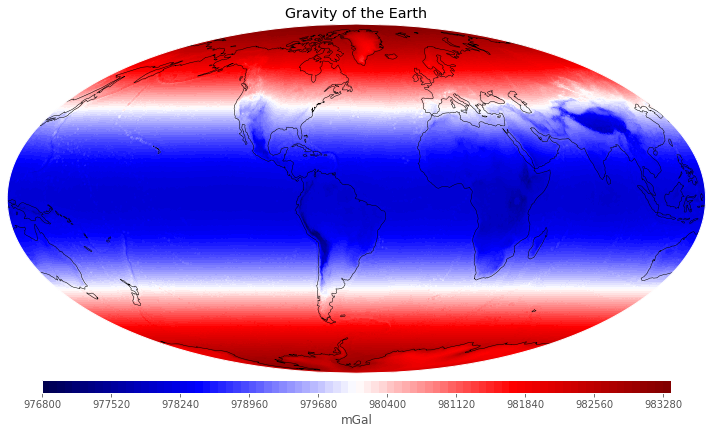

In [10]:
title_font = 20
bottom_font = 18
plt.figure(figsize=(10,10), tight_layout=True)

projection=ccrs.Mollweide(central_longitude=-50)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.set_title("Gravity of the Earth")
pg = ax.contourf(longitude,
                 latitude,
                 gravity,100,transform=ccrs.PlateCarree(),cmap='seismic')
cb = plt.colorbar(pg,label="mGal", orientation="horizontal", pad=.01, aspect=50, shrink=0.9)

file_name = 'images/gravity_earth'
plt.savefig(file_name+'.png',dpi=300)

plt.show()